In [1]:
import numpy as np
import cv2
from tkinter.filedialog import askopenfilename
from google.colab.patches import cv2_imshow

In [2]:
prewitt_x = np.array ( [ [ -1  , 0 ,  1 ] ,
                         [ -1  , 0 ,  1 ] ,
                         [ -1  , 0 ,  1 ] ] )
prewitt_y = np.array ( [ [ -1 , -1 , -1 ] ,
                         [  0 ,  0 ,  0 ] ,
                         [  1 ,  1 ,  1 ] ] )

In [3]:
def prewitt_edge_detection ( input , prewitt_matrix ) :
    result = np.zeros( input.shape )
    for y in range( 0, input.shape[ 0 ] - 2 ) :
        for x in range( 0, input.shape[ 1 ] - 2 ) :
            result[ y ] [ x ] = np.sum( prewitt_matrix * input [ y : y + 3, x : x + 3 ] )  # 2-dimensional convolution operation
    return result

In [4]:
def non_maxima_suppress ( img , angle ) :
    nms = np.zeros ( img.shape )
    for y in range ( 1 , img.shape [ 0 ] - 1 ) :
        for x in range ( 1 , img.shape [ 1 ] - 1 ) : # From each position (x, y), step in the two directions perpendicular to edge orientation Θ(x, y)
            if (angle [ y , x ] >= 0 and angle [ y , x ] < 22.5) :
                neighbour_value = max ( img [ y , x - 1 ] , img [ y , x + 1 ] )
            elif (angle [ y , x ] >= 22.5 and angle [y , x] < 67.5) :
                neighbour_value = max ( img [ y - 1 , x - 1 ] , img [ y + 1 , x + 1 ] )
            elif (angle [ y , x ] >= 67.5 and angle [ y , x ] < 112.5) :
                neighbour_value = max ( img [ y - 1 , x ] , img [ y + 1 , x ] )
            elif (angle [ y , x ] >= 112.5 and angle [ y , x ] < 157.5) :
                neighbour_value = max ( img [ y - 1 , x + 1 ] , img [ y + 1 , x - 1 ] )
            else :
                neighbour_value = max ( img [ y , x - 1 ] , img [ y , x + 1 ] )

            if img [ y , x ] < neighbour_value :
                nms [ y , x ] = 0  # If M(A) > M(C) or M(B) > M(C), discard pixel (x, y) by setting M(x, y) = 0
            else :
                nms [ y , x ] = img [ y , x ]
    return nms

In [5]:
images = '/content/1_prewitt.zip'

In [15]:
!unzip '/content/1_prewitt.zip'

Archive:  /content/1_prewitt.zip
replace circlegrey.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: circlegrey.png          
  inflating: circlegrey.tif          
 extracting: julia.png               
  inflating: julia.tif               
  inflating: motor.png               
  inflating: motor.tif               


Input


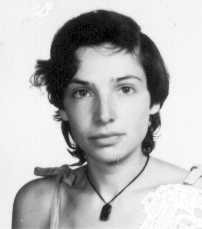

In [22]:
img = cv2.imread("/content/julia.png")
print("Input")
cv2_imshow( img )



Prewitt edge-detection


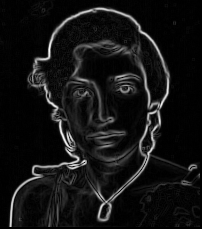

In [23]:
gray_img = cv2.cvtColor( img, cv2.COLOR_RGB2GRAY ) # in case the input is not gray
edge_x = prewitt_edge_detection( gray_img , prewitt_x )
edge_y = prewitt_edge_detection( gray_img , prewitt_y )
out = np.sqrt( edge_x ** 2 + edge_y ** 2 )
out = (out / np.max ( out )) * 255 # mapping values from [0, 255]
print("Prewitt edge-detection")
cv2_imshow(out.astype( np.uint8 ) )

Non-maxima suppress on edges


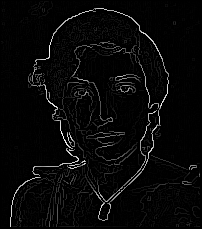

In [24]:
directions = np.rad2deg( np.arctan2 ( edge_y , edge_x ) ) #calculate the gradients' directions
directions[ directions < 0 ] += 180
nms = non_maxima_suppress ( out , directions )
print("Non-maxima suppress on edges")
cv2_imshow(nms.astype( np.uint8 ) )
